<a href="https://colab.research.google.com/github/prathammesta26/pratham_project/blob/main/zidio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ZIDIO INTERNSHIP 2025 TIME SERIES ANALYSIS TASK LIST***

PHASE-1 WEEK(1-2)

1. INSTALLING LIBRAIES AND DATA COLLECTION FROM TCS STOCK DATA

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download TCS data from Yahoo Finance
tcs = yf.download("TCS.NS", start="2015-01-01", end="2024-12-31")

# View the first few rows
tcs.head()

/tmp/ipython-input-2-1777239112.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs = yf.download("TCS.NS", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-01,1073.510498,1082.556381,1071.591649,1082.556381,366830
2015-01-02,1087.806519,1092.656303,1075.639948,1075.808595,925740
2015-01-05,1071.275024,1096.430600,1064.696146,1088.460127,1754242
2015-01-06,1031.781006,1066.572933,1028.997610,1066.572933,2423784
2015-01-07,1019.593262,1045.507956,1015.270628,1041.649256,2636332


PHASE-2 (WEEK 3-4)

2.DATA PREPROCESSING AND VISUALIZATION--   (load data and check missing values)

In [ ]:
tcs.to_csv("tcs_stock_data.csv") # this is the tcs stock data csv
tcs

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-01,1073.510498,1082.556381,1071.591649,1082.556381,366830
2015-01-02,1087.806519,1092.656303,1075.639948,1075.808595,925740
2015-01-05,1071.275024,1096.430600,1064.696146,1088.460127,1754242
2015-01-06,1031.781006,1066.572933,1028.997610,1066.572933,2423784
2015-01-07,1019.593262,1045.507956,1015.270628,1041.649256,2636332
...,...,...,...,...,...
2024-12-23,4097.958984,4155.807385,4055.188855,4139.103153,2195338
2024-12-24,4118.851562,4156.792892,4097.959002,4097.959002,1181886


In [ ]:
# Check basic info
tcs.info()

# Check for missing/null values
print("\nMissing Values:\n", tcs.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2015-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TCS.NS)   2466 non-null   float64
 1   (High, TCS.NS)    2466 non-null   float64
 2   (Low, TCS.NS)     2466 non-null   float64
 3   (Open, TCS.NS)    2466 non-null   float64
 4   (Volume, TCS.NS)  2466 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.6 KB

Missing Values:
 Price   Ticker
Close   TCS.NS    0
High    TCS.NS    0
Low     TCS.NS    0
Open    TCS.NS    0
Volume  TCS.NS    0
dtype: int64


(filling missing values if any) implace=True

In [ ]:
# Forward fill missing values (if any)
tcs.fillna(method='ffill', inplace=True)
print(tcs)

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2015-01-01  1073.510376  1082.556258  1071.591528  1082.556258   366830
2015-01-02  1087.806152  1092.655935  1075.639586  1075.808233   925740
2015-01-05  1071.275146  1096.430725  1064.696268  1088.460251  1754242
2015-01-06  1031.780762  1066.572681  1028.997367  1066.572681  2423784
2015-01-07  1019.593872  1045.508582  1015.271236  1041.649880  2636332
...                 ...          ...          ...          ...      ...
2024-12-23  4097.958984  4155.807385  4055.188855  4139.103153  2195338
2024-12-24  4118.851562  4156.792892  4097.959002  4097.959002  1181886
2024-12-26  4108.602539  4139.004973  4083.028905  4118.851529  1208464
2024-12-27  4104.414062  4120.280532  4087.069359  4102.590812   858100
2024-12-30  4098.452148  4138.364460  4052.331448  4090.765525  

/tmp/ipython-input-16-2480750985.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tcs.fillna(method='ffill', inplace=True)


((Plot the Closing Price))

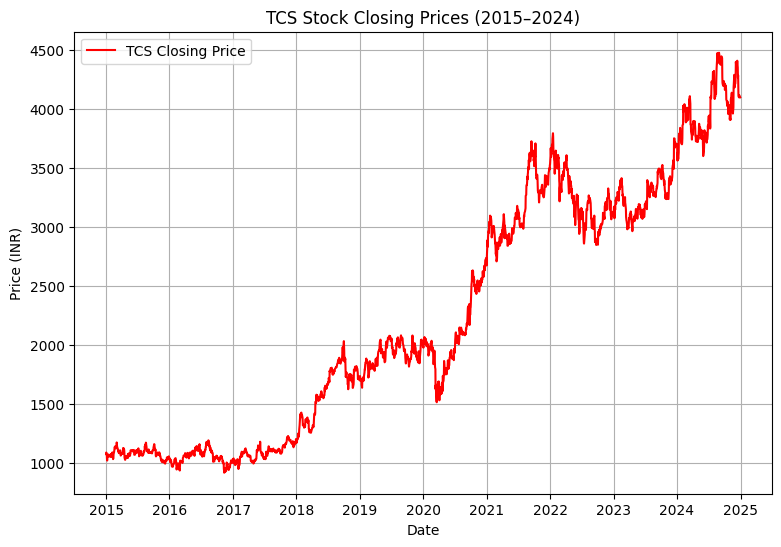

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.plot(tcs['Close'], label='TCS Closing Price', color='red')
plt.title("TCS Stock Closing Prices (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()


((plotting daily returns (volatility)))

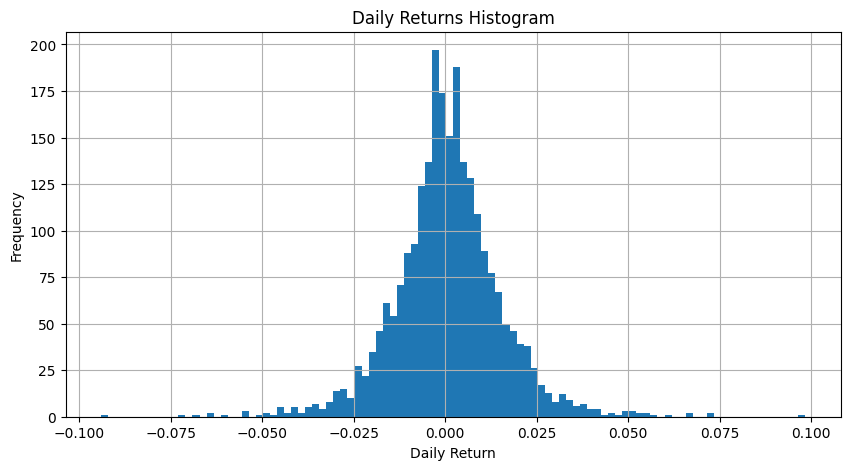

In [ ]:
# Calculate daily returns
tcs['Daily Return'] = tcs['Close'].pct_change()

# Plot histogram of returns
tcs['Daily Return'].hist(bins=100, figsize=(10, 5))
plt.title('Daily Returns Histogram')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


***-------XXXXXXXX------------------XXXXXXXXX------------------***----

PHASE-3a (WEEK 5-9)  MODELLING ARIMA statemodels,LSTM

1. ADF test checking for staionary

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] <= 0.05:
    print(" Data is stationary (d=0)")
else:
    print(" Data is not stationary (use d=1)")


ADF Statistic: -0.2563561532590817
p-value: 0.9314621886932883
 Data is not stationary (use d=1)


2.plotting ACF and PACF to estimate p and q

<Figure size 900x500 with 0 Axes>

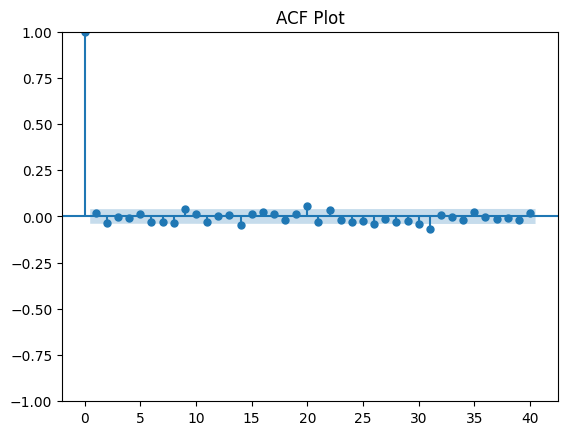

<Figure size 1200x500 with 0 Axes>

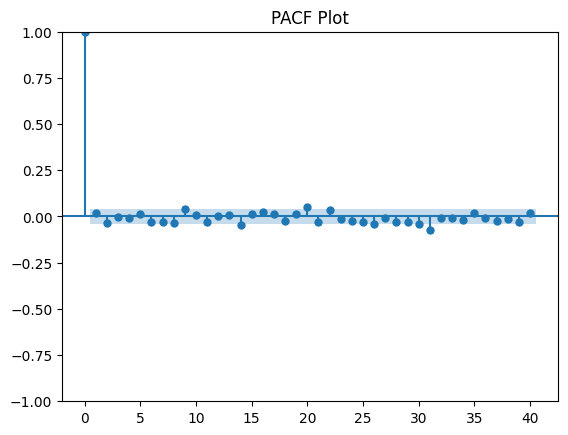

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plot_acf(ts.diff().dropna(), lags=40)
plt.title('ACF Plot')                                          # PACF first sharp drop → p   ACF first sharp drop → q
plt.show()
plt.figure(figsize=(12,5))
plot_pacf(ts.diff().dropna(), lags=40)
plt.title('PACF Plot')
plt.show()


3. Fit ARIMA model using statesmodels

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Example ARIMA(5,1,0) — adjust if needed
model = ARIMA(ts, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                 2466
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12238.181
Date:                Thu, 24 Jul 2025   AIC                          24488.361
Time:                        10:22:17   BIC                          24523.221
Sample:                             0   HQIC                         24501.026
                               - 2466                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0180      0.016      1.123      0.261      -0.013       0.049
ar.L2         -0.0322      0.015     -2.141      0.032      -0.062      -0.003
ar.L3         -0.0007      0.015     -0.044      0.9

4.Forecast & Compare to Actual Data

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

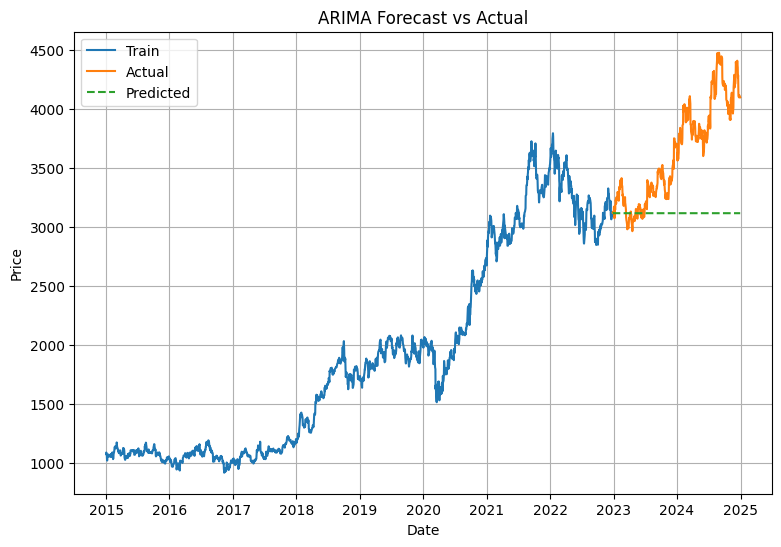

In [ ]:
# Split into train and test
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Re-fit on training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast next steps (same length as test)
forecast = model_fit.forecast(steps=len(test))

# Plot
plt.figure(figsize=(9,6))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(test.index, forecast, label='Predicted', linestyle='--')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


5. Evaluate the acuracy

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 669.6622862260131
MAE: 530.8764176723853


PHASE-3b Prophets model (Facebook's time forcasting)

1.prepare data for prophet in tcs stock analysis

In [ ]:
from prophet import Prophet

# Prepare DataFrame
df_prophet = tcs.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']
df_prophet = df_prophet.dropna()
df_prophet.head()



,ds,y
0,2015-01-01,1073.510376
1,2015-01-02,1087.806152
2,2015-01-05,1071.275146
3,2015-01-06,1031.780762
4,2015-01-07,1019.593872


2.Train Prophet Model & plot the forcast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfmt4k3_/kho0oce7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnfmt4k3_/dv7x60w2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95963', 'data', 'file=/tmp/tmpnfmt4k3_/kho0oce7.json', 'init=/tmp/tmpnfmt4k3_/dv7x60w2.json', 'output', 'file=/tmp/tmpnfmt4k3_/prophet_model2gu2lsng/prophet_model-20250724104154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


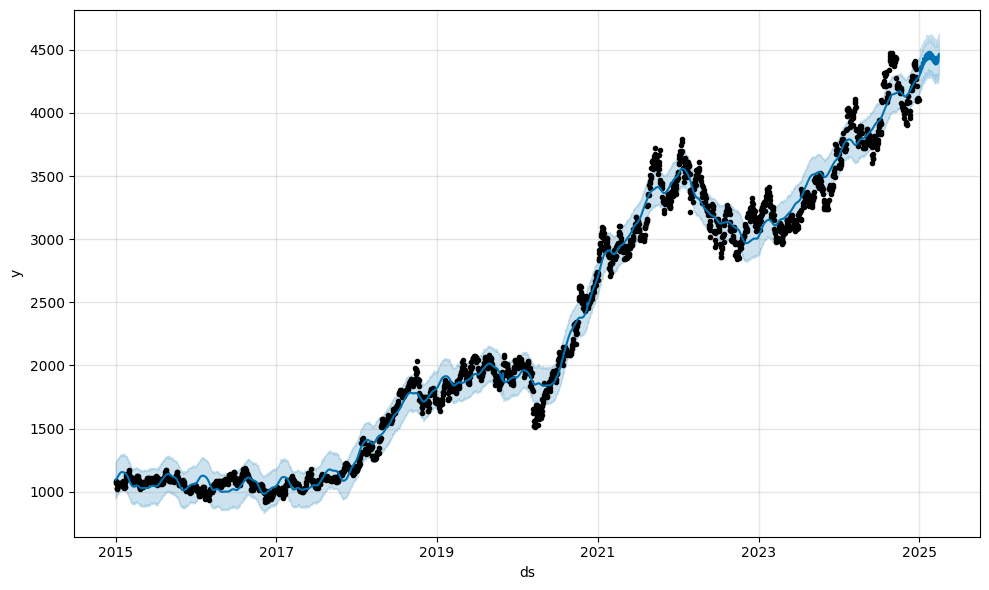

In [ ]:
model = Prophet()
model.fit(df_prophet)

# Create future dataframe (e.g., 90 days ahead)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
# Plot forecast
fig1 = model.plot(forecast)


3.compare actual data with prophets forcasting and plotting

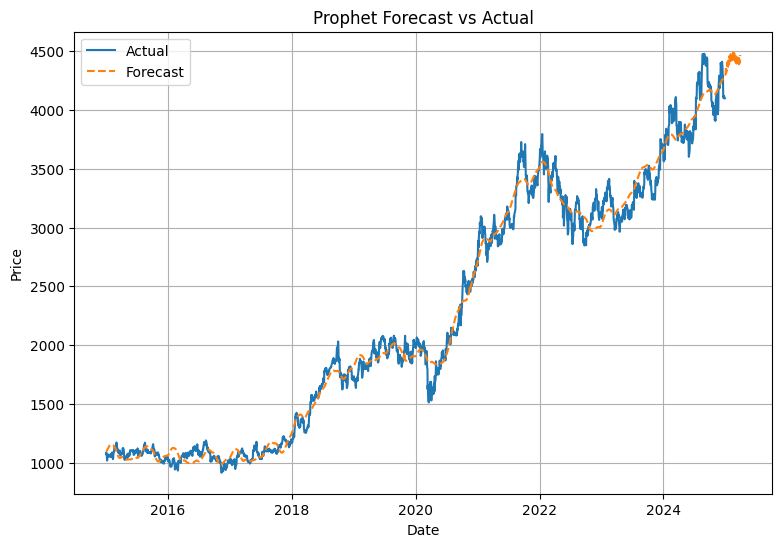

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
plt.title("Prophet Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


PHASE 3c (LSTM MODEL) its DL model in which it learns time series in form of temporal patterns

1.Importing library and prepare the data for lstm

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0414 - val_loss: 0.0013
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 4.5642e-04 - val_loss: 0.0015
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 4.3153e-04 - val_loss: 0.0014
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.0732e-04 - val_loss: 8.5659e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.6301e-04 - val_loss: 8.9182e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 3.6967e-04 - val_loss: 7.5341e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 3.8319e-04 - val_loss: 9.5784e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 3.6978e-04 - val_loss: 9.6043e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.4091e-04 - val_loss: 6.8194e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 3.3954e-04 - val_loss: 0.0014
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


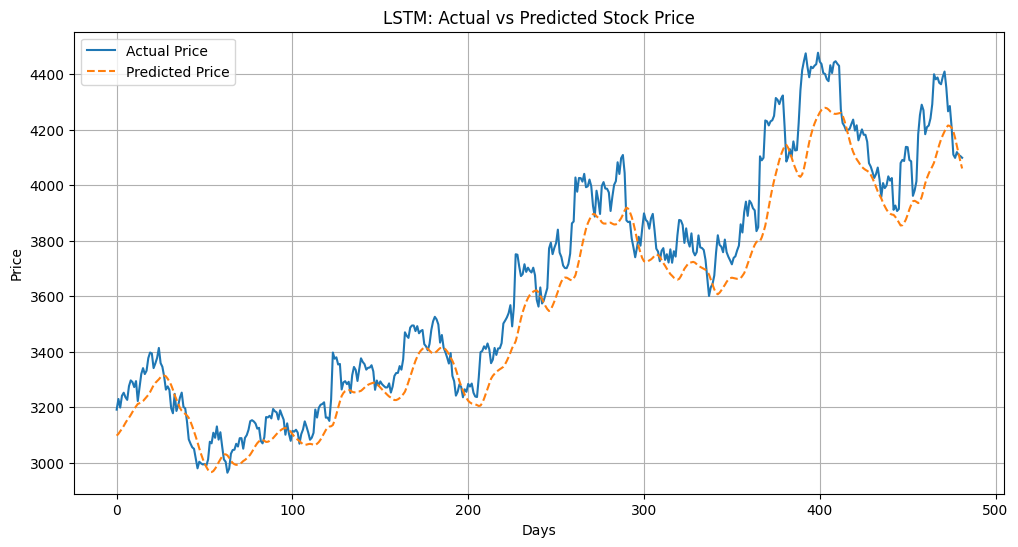

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Use only the Close prices
data = tcs[['Close']].values

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Set sequence length
sequence_len = 60

X = []
y = []

for i in range(sequence_len, len(scaled_data)):
    X.append(scaled_data[i-sequence_len:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)
#train-test split
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
#build lstm model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
#train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
#make prediction and plot
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test)

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price', linestyle='--')
plt.title("LSTM: Actual vs Predicted Stock Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


7. evaluate lstm accuracy

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
mae = mean_absolute_error(real_prices, predicted_prices)

print(f"RMSE (LSTM): {rmse}")
print(f"MAE (LSTM): {mae}")


RMSE (LSTM): 130.85567553348727
MAE (LSTM): 103.81856299435944


PHASE 4 model camparison and tuning (week 9)

In [ ]:
# 1.collecting ARIMA,Prophets, LSTM evaluation metrics

#ARIMA- RMSE: 669.6622862260131,MAE: 530.8764176723853
#Propehts-RMSE (Prophet): 273.5245539421691,MAE (Prophet): 228.63656673269716
#RMSE (LSTM): 130.85567553348727,MAE (LSTM): 103.81856299435944

2.plot comparison graph for three models

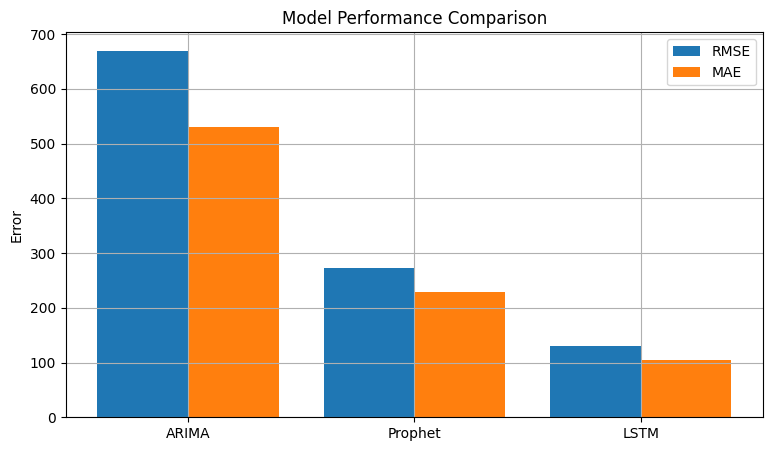

In [ ]:
import matplotlib.pyplot as plt

models = ['ARIMA', 'Prophet', 'LSTM']
rmse_values = [669.6622862260131,273.5245539421691,130.85567553348727] # Replace with your actual values
mae_values = [ 530.8764176723853,228.63656673269716,103.81856299435944]

x = range(len(models))

plt.figure(figsize=(9, 5))

plt.bar(x, rmse_values, width=0.4, label='RMSE', align='center')
plt.bar([i + 0.4 for i in x], mae_values, width=0.4, label='MAE', align='center')

plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Error')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()


3. Tuning for each models  means changing the value parameter to get better accuracy

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = ARIMA(train, order=(2,1,1))        # changing p,d,q with diff values
model_fit = model.fit()
  #for arima sarima
# Summary of the model
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                 1972
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9587.057
Date:                Thu, 24 Jul 2025   AIC                          19182.113
Time:                        11:54:27   BIC                          19204.458
Sample:                             0   HQIC                         19190.324
                               - 1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2029      0.363      0.559      0.576      -0.509       0.915
ar.L2         -0.0439      0.015     -2.840      0.005      -0.074      -0.014
ma.L1         -0.2049      0.364     -0.564      0.5

PHASE- 5 final output deployment and presentation (week 10-12)

In [ ]:
# using streamlit taking visual graphs of each model upload and run streamlit dashboard final devliery

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title("TCS Stock Forecast Dashboard")

df = pd.read_csv("tcs_stock_data.csv")
st.line_chart(df['Close'])

# Add forecast visuals as images or Matplotlib plots


2025-07-27 09:15:40.117 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 09:15:40.275 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-27 09:15:40.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 09:15:40.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 09:15:41.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 09:15:41.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 09:15:41.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.61.8.78:8501

